<a href="https://colab.research.google.com/github/SrijanDas/handwritten-digit-recognition/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Fetching dataset

In [2]:
mnist = tf.keras.datasets.mnist

# Train Test Split
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(X_train[0])
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## Visualizing the data

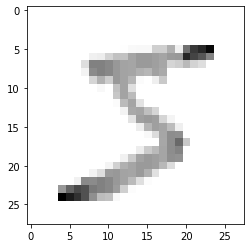

In [3]:
digit = X_train[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [4]:
y_train[0]

5

## Creating the model

In [5]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4674 - accuracy: 0.8703
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1163 - accuracy: 0.9634
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0736 - accuracy: 0.9772


## Calculation of Accuracy and Loss

In [8]:
loss, accuaracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuaracy)
print("Loss: ", loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1101 - accuracy: 0.9670
Accuracy:  0.9670000076293945
Loss:  0.11009001731872559


In [9]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model/assets


## Loading handwritten digits

In [10]:
!pip install opencv-python

In [11]:
import cv2 as cv
import numpy as np

In [12]:
pretrained_model = tf.keras.models.load_model('digits.model')

The digit is probably: 8


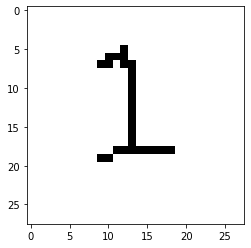

The digit is probably: 2


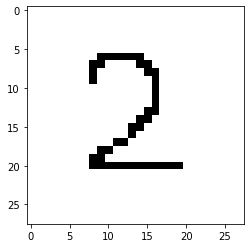

The digit is probably: 3


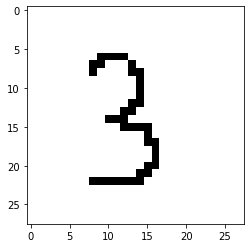

The digit is probably: 4


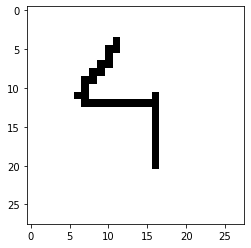

The digit is probably: 7


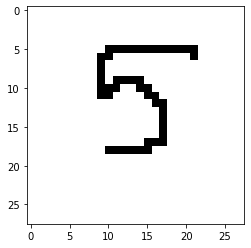

The digit is probably: 6


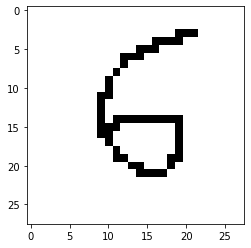

In [14]:
for i in range(1,7):
  img = cv.imread(f'{i}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = pretrained_model.predict(img)
  print(f"The digit is probably: {np.argmax(prediction)}")
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()